# Fine-tuning SpeechT5 for multilingual TTS

In [4]:
!nvidia-smi

Sat Oct 19 05:18:45 2024       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.90.07              Driver Version: 550.90.07      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla P100-PCIE-16GB           Off |   00000000:00:04.0 Off |                    0 |
| N/A   36C    P0             26W /  250W |       0MiB /  16384MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

## Load the model

In [5]:
from transformers import SpeechT5Processor, SpeechT5ForTextToSpeech, XLMRobertaTokenizer

processor = SpeechT5Processor.from_pretrained("microsoft/speecht5_tts")
model = SpeechT5ForTextToSpeech.from_pretrained("microsoft/speecht5_tts")

preprocessor_config.json:   0%|          | 0.00/433 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/232 [00:00<?, ?B/s]

spm_char.model:   0%|          | 0.00/238k [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/40.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/234 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/2.06k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/585M [00:00<?, ?B/s]

## Load the dataset

In [6]:
from huggingface_hub import login

token= "Enter Token"
login(token)

The token has not been saved to the git credentials helper. Pass `add_to_git_credential=True` in this function directly or `--add-to-git-credential` if using via `huggingface-cli` if you want to set the git credential as well.
Token is valid (permission: write).
Your token has been saved to /root/.cache/huggingface/token
Login successful


In [7]:
from datasets import load_dataset, Audio

dataset = load_dataset("mozilla-foundation/common_voice_17_0", "ta", split = 'train')

model.safetensors:   0%|          | 0.00/585M [00:00<?, ?B/s]

common_voice_17_0.py:   0%|          | 0.00/8.19k [00:00<?, ?B/s]

README.md:   0%|          | 0.00/12.7k [00:00<?, ?B/s]

languages.py:   0%|          | 0.00/3.92k [00:00<?, ?B/s]

release_stats.py:   0%|          | 0.00/132k [00:00<?, ?B/s]

The repository for mozilla-foundation/common_voice_17_0 contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/mozilla-foundation/common_voice_17_0.
You can avoid this prompt in future by passing the argument `trust_remote_code=True`.

Do you wish to run the custom code? [y/N]  y


n_shards.json:   0%|          | 0.00/17.5k [00:00<?, ?B/s]

ta_train_0.tar:   0%|          | 0.00/1.60G [00:00<?, ?B/s]

ta_train_1.tar:   0%|          | 0.00/225M [00:00<?, ?B/s]

ta_dev_0.tar:   0%|          | 0.00/434M [00:00<?, ?B/s]

ta_test_0.tar:   0%|          | 0.00/455M [00:00<?, ?B/s]

ta_other_0.tar:   0%|          | 0.00/1.56G [00:00<?, ?B/s]

ta_other_1.tar:   0%|          | 0.00/1.52G [00:00<?, ?B/s]

ta_other_2.tar:   0%|          | 0.00/496M [00:00<?, ?B/s]

ta_invalidated_0.tar:   0%|          | 0.00/231M [00:00<?, ?B/s]

ta_validated_0.tar:   0%|          | 0.00/1.45G [00:00<?, ?B/s]

ta_validated_1.tar:   0%|          | 0.00/1.53G [00:00<?, ?B/s]

ta_validated_2.tar:   0%|          | 0.00/1.65G [00:00<?, ?B/s]

ta_validated_3.tar:   0%|          | 0.00/653M [00:00<?, ?B/s]

train.tsv:   0%|          | 0.00/19.6M [00:00<?, ?B/s]

transcript/ta/dev.tsv:   0%|          | 0.00/5.20M [00:00<?, ?B/s]

transcript/ta/test.tsv:   0%|          | 0.00/4.94M [00:00<?, ?B/s]

other.tsv:   0%|          | 0.00/39.5M [00:00<?, ?B/s]

transcript/ta/invalidated.tsv:   0%|          | 0.00/2.50M [00:00<?, ?B/s]

validated.tsv:   0%|          | 0.00/56.8M [00:00<?, ?B/s]

Generating train split: 0 examples [00:00, ? examples/s]


Reading metadata...: 0it [00:00, ?it/s]
Reading metadata...: 8985it [00:00, 89827.81it/s]
Reading metadata...: 18544it [00:00, 93214.04it/s]
Reading metadata...: 27866it [00:00, 91614.33it/s]
Reading metadata...: 45587it [00:00, 90796.04it/s]


Generating validation split: 0 examples [00:00, ? examples/s]


Reading metadata...: 0it [00:00, ?it/s]
Reading metadata...: 12095it [00:00, 97374.76it/s][A


Generating test split: 0 examples [00:00, ? examples/s]


Reading metadata...: 0it [00:00, ?it/s]
Reading metadata...: 12074it [00:00, 92847.04it/s][A


Generating other split: 0 examples [00:00, ? examples/s]


Reading metadata...: 0it [00:00, ?it/s]
Reading metadata...: 9686it [00:00, 96848.09it/s]
Reading metadata...: 19465it [00:00, 97381.01it/s]
Reading metadata...: 29204it [00:00, 92268.39it/s]
Reading metadata...: 38461it [00:00, 91772.98it/s]
Reading metadata...: 48230it [00:00, 93850.86it/s]
Reading metadata...: 57740it [00:00, 94265.60it/s]
Reading metadata...: 67179it [00:00, 93672.82it/s]
Reading metadata...: 76555it [00:00, 92065.65it/s]
Reading metadata...: 93989it [00:01, 90878.18it/s]


Generating invalidated split: 0 examples [00:00, ? examples/s]


Reading metadata...: 5693it [00:00, 95897.43it/s]


Generating validated split: 0 examples [00:00, ? examples/s]


Reading metadata...: 0it [00:00, ?it/s]
Reading metadata...: 10106it [00:00, 101050.22it/s]
Reading metadata...: 20212it [00:00, 94586.98it/s] 
Reading metadata...: 30200it [00:00, 96912.19it/s]
Reading metadata...: 39915it [00:00, 95577.19it/s]
Reading metadata...: 49488it [00:00, 92957.64it/s]
Reading metadata...: 58800it [00:00, 90904.55it/s]
Reading metadata...: 67904it [00:00, 89366.38it/s]
Reading metadata...: 77263it [00:00, 90657.04it/s]
Reading metadata...: 86340it [00:00, 88409.25it/s]
Reading metadata...: 95716it [00:01, 90000.37it/s]
Reading metadata...: 105073it [00:01, 91063.92it/s]
Reading metadata...: 114670it [00:01, 92527.85it/s]
Reading metadata...: 124113it [00:01, 93095.36it/s]
Reading metadata...: 135391it [00:01, 91912.89it/s]


It's important to set the sampling rate of the audio data to 16 kHz, which is what SpeechT5 expects.

In [8]:
dataset = dataset.cast_column("audio", Audio(sampling_rate=16000))

In [9]:
len(dataset)

45587

## Clean up the text


First we'll need to find out what the unsupported tokens are. The `SpeechT5Tokenizer` works with characters as tokens, so let's extract all distinct characters of the dataset. We write a mapping function `extract_all_chars` that concatenates the transcriptions from all examples into one long transcription and then transforms the string into a set of characters. It is important to pass the arguments `batched=True` and `batch_size=-1` to `dataset.map(...)` so that the mapping function has access to all transcriptions at once.

In [10]:
tokenizer = processor.tokenizer

In [11]:
def extract_all_chars(batch):
    all_text = " ".join(batch["sentence"])
    vocab = list(set(all_text))
    return {"vocab": [vocab], "all_text": [all_text]}

vocabs = dataset.map(
    extract_all_chars,
    batched=True,
    batch_size=-1,
    keep_in_memory=True,
    remove_columns=dataset.column_names,
)

dataset_vocab = set(vocabs["vocab"][0])
tokenizer_vocab = {k for k,_ in tokenizer.get_vocab().items()}

Map:   0%|          | 0/45587 [00:00<?, ? examples/s]

Now we have two sets of characters, one with the vocabulary from the dataset and one with the vocabulary from the tokenizer. By taking the difference between these sets, we find the characters that are in the dataset but not in the tokenizer.

In [12]:
dataset_vocab - tokenizer_vocab

{' ',
 '&',
 '_',
 '`',
 '·',
 'á',
 'ô',
 'š',
 'ஃ',
 'அ',
 'ஆ',
 'இ',
 'ஈ',
 'உ',
 'ஊ',
 'எ',
 'ஏ',
 'ஐ',
 'ஒ',
 'ஓ',
 'ஔ',
 'க',
 'ங',
 'ச',
 'ஜ',
 'ஞ',
 'ட',
 'ண',
 'த',
 'ந',
 'ன',
 'ப',
 'ம',
 'ய',
 'ர',
 'ற',
 'ல',
 'ள',
 'ழ',
 'வ',
 'ஷ',
 'ஸ',
 'ஹ',
 'ா',
 'ி',
 'ீ',
 'ு',
 'ூ',
 'ெ',
 'ே',
 'ை',
 'ொ',
 'ோ',
 'ௌ',
 '்',
 'ௗ',
 'ഥ',
 '–',
 '‘',
 '’',
 '‚',
 '“',
 '”',
 '•',
 '…',
 '′',
 '″',
 '●',
 '◯'}

In [13]:
replacements = [
    (' ', ' '),  # Space
    ('&', 'and'),  # Ampersand
    ('_', '_'),  # Underscore
    ('`', '`'),  # Backtick
    ('·', '.'),  # Middle dot
    ('á', 'a'),  # Accent on 'a'
    ('ô', 'o'),  # Accent on 'o'
    ('š', 's'),  # 'S' with caron (soft s sound)
    ('ஃ', 'akh'),  # Aytham (Tamil diacritic)
    ('அ', 'a'),  # Tamil letter A
    ('ஆ', 'aa'),  # Tamil letter AA
    ('இ', 'i'),  # Tamil letter I
    ('ஈ', 'ii'),  # Tamil letter II
    ('உ', 'u'),  # Tamil letter U
    ('ஊ', 'uu'),  # Tamil letter UU
    ('எ', 'e'),  # Tamil letter E
    ('ஏ', 'ee'),  # Tamil letter EE
    ('ஐ', 'ai'),  # Tamil letter AI
    ('ஒ', 'o'),  # Tamil letter O
    ('ஓ', 'oo'),  # Tamil letter OO
    ('ஔ', 'au'),  # Tamil letter AU
    ('க', 'ka'),  # Tamil letter KA
    ('ங', 'nga'),  # Tamil letter NGA
    ('ச', 'cha'),  # Tamil letter CHA
    ('ஜ', 'ja'),  # Tamil letter JA
    ('ஞ', 'nya'),  # Tamil letter NYA
    ('ட', 'ta'),  # Tamil letter TTA (retroflex T)
    ('ண', 'na'),  # Tamil letter NNA (retroflex N)
    ('த', 'tha'),  # Tamil letter THA
    ('ந', 'na'),  # Tamil letter NA
    ('ன', 'na'),  # Tamil letter NN (alveolar N)
    ('ப', 'pa'),  # Tamil letter PA
    ('ம', 'ma'),  # Tamil letter MA
    ('ய', 'ya'),  # Tamil letter YA
    ('ர', 'ra'),  # Tamil letter RA
    ('ற', 'rra'),  # Tamil letter RRA (retroflex R)
    ('ல', 'la'),  # Tamil letter LA
    ('ள', 'lla'),  # Tamil letter LLA (retroflex L)
    ('ழ', 'zha'),  # Tamil letter LLA (unique Tamil letter)
    ('வ', 'va'),  # Tamil letter VA
    ('ஷ', 'sha'),  # Tamil letter SHA
    ('ஸ', 'sa'),  # Tamil letter SA
    ('ஹ', 'ha'),  # Tamil letter HA
    ('ா', 'aa'),  # Long A (Tamil vowel extension)
    ('ி', 'i'),  # Short I (Tamil vowel extension)
    ('ீ', 'ii'),  # Long I (Tamil vowel extension)
    ('ு', 'u'),  # Short U (Tamil vowel extension)
    ('ூ', 'uu'),  # Long U (Tamil vowel extension)
    ('ெ', 'e'),  # Short E (Tamil vowel extension)
    ('ே', 'ee'),  # Long E (Tamil vowel extension)
    ('ை', 'ai'),  # Tamil diphthong AI
    ('ொ', 'o'),  # Short O (Tamil vowel extension)
    ('ோ', 'oo'),  # Long O (Tamil vowel extension)
    ('ௌ', 'au'),  # Tamil diphthong AU
    ('்', ''),  # Tamil virama (removes inherent vowel)
    ('ௗ', 'au'),  # Rare Tamil vowel diacritic
    ('ഥ', 'tha'),  # Malayalam letter THA
    ('–', '-'),  # En dash
    ('‘', "'"),  # Left single quotation mark
    ('’', "'"),  # Right single quotation mark
    ('‚', ','),  # Single low quotation mark
    ('“', '"'),  # Left double quotation mark
    ('”', '"'),  # Right double quotation mark
    ('•', '.'),  # Bullet point
    ('…', '...'),  # Ellipsis
    ('′', "'"),  # Prime (minutes or feet symbol)
    ('″', '"'),  # Double prime (seconds or inches symbol)
    ('●', '.'),  # Filled bullet
    ('◯', 'o'),  # Circle symbol
]

def cleanup_text(inputs):
    for src, dst in replacements:
        inputs["sentence"] = inputs["sentence"].replace(src, dst)
    return inputs

dataset = dataset.map(cleanup_text)


Map:   0%|          | 0/45587 [00:00<?, ? examples/s]

## Speaker embeddings

To allow the TTS model to distinguish between multiple speakers, we'll need to create a speaker embedding for each example. The speaker embedding is simply an additional input into the model that captures a particular speaker's voice characteristics.

To create the speaker embeddings, we use the [spkrec-xvect-voxceleb](https://huggingface.co/speechbrain/spkrec-xvect-voxceleb) model from SpeechBrain. The following defines a function `create_speaker_embedding()` that takes an input audio waveform and outputs a 512-element vector containing the corresponding speaker embedding.

In [14]:
import os
import torch
from speechbrain.pretrained import EncoderClassifier

spk_model_name = "speechbrain/spkrec-xvect-voxceleb"

device = "cuda" if torch.cuda.is_available() else "cpu"
speaker_model = EncoderClassifier.from_hparams(
    source=spk_model_name,
    run_opts={"device": device},
    savedir=os.path.join("/tmp", spk_model_name)
)

def create_speaker_embedding(waveform):
    with torch.no_grad():
        speaker_embeddings = speaker_model.encode_batch(torch.tensor(waveform))
        speaker_embeddings = torch.nn.functional.normalize(speaker_embeddings, dim=2)
        speaker_embeddings = speaker_embeddings.squeeze().cpu().numpy()
    return speaker_embeddings

/tmp/ipykernel_30/1262525938.py:3: UserWarning: Module 'speechbrain.pretrained' was deprecated, redirecting to 'speechbrain.inference'. Please update your script. This is a change from SpeechBrain 1.0. See: https://github.com/speechbrain/speechbrain/releases/tag/v1.0.0
  from speechbrain.pretrained import EncoderClassifier


hyperparams.yaml:   0%|          | 0.00/2.04k [00:00<?, ?B/s]

/opt/conda/lib/python3.10/site-packages/speechbrain/utils/autocast.py:68: FutureWarning: `torch.cuda.amp.custom_fwd(args...)` is deprecated. Please use `torch.amp.custom_fwd(args..., device_type='cuda')` instead.
  wrapped_fwd = torch.cuda.amp.custom_fwd(fwd, cast_inputs=cast_inputs)


embedding_model.ckpt:   0%|          | 0.00/16.9M [00:00<?, ?B/s]

mean_var_norm_emb.ckpt:   0%|          | 0.00/3.20k [00:00<?, ?B/s]

classifier.ckpt:   0%|          | 0.00/15.9M [00:00<?, ?B/s]

label_encoder.txt:   0%|          | 0.00/129k [00:00<?, ?B/s]

/opt/conda/lib/python3.10/site-packages/speechbrain/utils/checkpoints.py:194: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load(path, map_location=device

## Preparing the dataset

The `prepare_dataset` function takes in a single example and uses the `SpeechT5Processor` object to tokenize the input text and load the target audio into a log-mel spectrogram. It also adds the speaker embeddings as an additional input.

In [15]:
def prepare_dataset(example):
    # load the audio data; if necessary, this resamples the audio to 16kHz
    audio = example["audio"]

    # feature extraction and tokenization
    example = processor(
        text=example["sentence"],
        audio_target=audio["array"],
        sampling_rate=audio["sampling_rate"],
        return_attention_mask=False,
    )

    # strip off the batch dimension
    example["labels"] = example["labels"][0]

    # use SpeechBrain to obtain x-vector
    example["speaker_embeddings"] = create_speaker_embedding(audio["array"])

    return example

Let's verify the processing is correct by looking at a single example:

In [16]:
processed_example = prepare_dataset(dataset[0])

This should give us:

- the tokens for the input text in `input_ids`
- the speaker embedding in `speaker_embeddings`
- the target spectrogram in `labels`

In [17]:
list(processed_example.keys())

['input_ids', 'labels', 'speaker_embeddings']

The tokens should decode into the original text, with `</s>` to mark the end of the sentence.

In [18]:
tokenizer.decode(processed_example["input_ids"])

'avaraaipa paothaumakakalla vaitaaamala painanaaalaeeyaee thaurathathaika kaonataee ootainaaarakalla.</s>'

Speaker embeddings should be a 512-element vector:

In [19]:
processed_example["speaker_embeddings"].shape

(512,)

The labels should be a log-mel spectrogram with 80 mel bins.

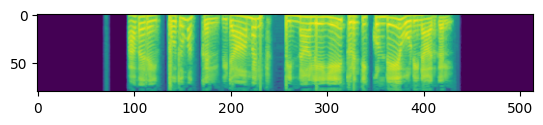

In [20]:
import matplotlib.pyplot as plt
plt.figure()
plt.imshow(processed_example["labels"].T)
plt.show()

If we run a vocoder on the log-mel spectrogram, it should produce the original audio again. We'll load the HiFi-GAN vocoder from the original [SpeechT5 checkpoint](https://hf.co/microsoft/speecht5_hifigan).

In [21]:
from transformers import SpeechT5HifiGan
vocoder = SpeechT5HifiGan.from_pretrained("microsoft/speecht5_hifigan")

config.json:   0%|          | 0.00/636 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/50.7M [00:00<?, ?B/s]

In [22]:
spectrogram = torch.tensor(processed_example["labels"])
with torch.no_grad():
    speech = vocoder(spectrogram)

model.safetensors:   0%|          | 0.00/50.6M [00:00<?, ?B/s]

In [23]:
from IPython.display import Audio
Audio(speech.cpu().numpy(), rate=16000)

In [25]:
dataset = dataset.map(
    prepare_dataset, remove_columns=dataset.column_names,
)

Map:   0%|          | 0/45587 [00:00<?, ? examples/s]

Some of the examples in the dataset are apparently longer than the maximum input length the model can handle (600 tokens), so we should remove those from the dataset.

In [26]:
def is_not_too_long(input_ids):
    input_length = len(input_ids)
    return input_length < 200

dataset = dataset.filter(is_not_too_long, input_columns=["input_ids"])

Filter:   0%|          | 0/45587 [00:00<?, ? examples/s]

In [27]:
len(dataset)

44635

## Train/test split

In [28]:
dataset = dataset.train_test_split(test_size=0.1)

In [29]:
dataset

DatasetDict({
    train: Dataset({
        features: ['input_ids', 'labels', 'speaker_embeddings'],
        num_rows: 40171
    })
    test: Dataset({
        features: ['input_ids', 'labels', 'speaker_embeddings'],
        num_rows: 4464
    })
})

## Collator to make batches

We need to define a custom collator to combine multiple examples into a batch. This will pad shorter sequences with padding tokens. For the spectrogram labels, the padded portions are replaced with the special value -100. This special value tells the model to ignore that part of the spectrogram when calculating the spectrogram loss.


In [30]:
from dataclasses import dataclass
from typing import Any, Dict, List, Union

@dataclass
class TTSDataCollatorWithPadding:
    processor: Any

    def __call__(self, features: List[Dict[str, Union[List[int], torch.Tensor]]]) -> Dict[str, torch.Tensor]:

        input_ids = [{"input_ids": feature["input_ids"]} for feature in features]
        label_features = [{"input_values": feature["labels"]} for feature in features]
        speaker_features = [feature["speaker_embeddings"] for feature in features]

        # collate the inputs and targets into a batch
        batch = processor.pad(
            input_ids=input_ids,
            labels=label_features,
            return_tensors="pt",
        )

        # replace padding with -100 to ignore loss correctly
        batch["labels"] = batch["labels"].masked_fill(
            batch.decoder_attention_mask.unsqueeze(-1).ne(1), -100
        )

        # not used during fine-tuning
        del batch["decoder_attention_mask"]

        # round down target lengths to multiple of reduction factor
        if model.config.reduction_factor > 1:
            target_lengths = torch.tensor([
                len(feature["input_values"]) for feature in label_features
            ])
            target_lengths = target_lengths.new([
                length - length % model.config.reduction_factor for length in target_lengths
            ])
            max_length = max(target_lengths)
            batch["labels"] = batch["labels"][:, :max_length]

        # also add in the speaker embeddings
        batch["speaker_embeddings"] = torch.tensor(speaker_features)

        return batch

In SpeechT5, the input to the decoder part of the model is reduced by a factor 2. In other words, it throws away every other timestep from the target sequence. The decoder then predicts a sequence that is twice as long. Since the original target sequence length may be odd, the data collator makes sure to round the maximum length of the batch down to be a multiple of 2.

In [31]:
data_collator = TTSDataCollatorWithPadding(processor=processor)

Let's test the data collator.

In [32]:
features = [
    dataset["train"][0],
    dataset["train"][1],
    dataset["train"][20],
]

batch = data_collator(features)

In [33]:
{k:v.shape for k,v in batch.items()}

{'input_ids': torch.Size([3, 138]),
 'attention_mask': torch.Size([3, 138]),
 'labels': torch.Size([3, 520, 80]),
 'speaker_embeddings': torch.Size([3, 512])}

## Training

The `use_cache=True` option is incompatible with gradient checkpointing. Disable it for training, otherwise it keeps complaining about it.

In [34]:
model.config.use_cache = False

In [35]:
from transformers import Seq2SeqTrainingArguments

training_args = Seq2SeqTrainingArguments(
    output_dir="./speecht5_tts_ta",  # change to a repo name of your choice
    per_device_train_batch_size=16,
    gradient_accumulation_steps=2,
    learning_rate=1e-5,
    warmup_steps=1000,
    max_steps=4000,
    gradient_checkpointing=True,
    fp16=True,
    evaluation_strategy="steps",
    per_device_eval_batch_size=8,
    save_steps=1000,
    eval_steps=1000,
    logging_steps=25,
    report_to=["tensorboard"],
    load_best_model_at_end=True,
    greater_is_better=False,
    label_names=["labels"],
    push_to_hub=True  
)

/opt/conda/lib/python3.10/site-packages/transformers/training_args.py:1559: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


Create the trainer object using the model, dataset, and data collator.

In [36]:
from transformers import Seq2SeqTrainer

trainer = Seq2SeqTrainer(
    args=training_args,
    model=model,
    train_dataset=dataset["train"],
    eval_dataset=dataset["test"],
    data_collator=data_collator,
    tokenizer=processor.tokenizer,  
)


/tmp/ipykernel_30/715646114.py:3: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Seq2SeqTrainer.__init__`. Use `processing_class` instead.
  trainer = Seq2SeqTrainer(
max_steps is given, it will override any value given in num_train_epochs


In [37]:
trainer.train()

/opt/conda/lib/python3.10/site-packages/torch/utils/checkpoint.py:295: FutureWarning: `torch.cpu.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cpu', args...)` instead.
  with torch.enable_grad(), device_autocast_ctx, torch.cpu.amp.autocast(**ctx.cpu_autocast_kwargs):  # type: ignore[attr-defined]


Step,Training Loss,Validation Loss
1000,1.139300,0.515783
2000,1.057800,0.482499
3000,1.024500,0.472027
4000,1.031700,0.471139


/opt/conda/lib/python3.10/site-packages/transformers/modeling_utils.py:2785: UserWarning: Moving the following attributes in the config to the generation config: {'max_length': 1876}. You are seeing this warning because you've set generation parameters in the model config, as opposed to in the generation config.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torch/utils/checkpoint.py:295: FutureWarning: `torch.cpu.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cpu', args...)` instead.
  with torch.enable_grad(), device_autocast_ctx, torch.cpu.amp.autocast(**ctx.cpu_autocast_kwargs):  # type: ignore[attr-defined]
/opt/conda/lib/python3.10/site-packages/torch/utils/checkpoint.py:295: FutureWarning: `torch.cpu.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cpu', args...)` instead.
  with torch.enable_grad(), device_autocast_ctx, torch.cpu.amp.autocast(**ctx.cpu_autocast_kwargs):  # type: ignore[attr-defined]
/opt/conda/lib/python3.10

TrainOutput(global_step=4000, training_loss=1.142247733592987, metrics={'train_runtime': 10172.1606, 'train_samples_per_second': 12.583, 'train_steps_per_second': 0.393, 'total_flos': 1.9542978387545976e+16, 'train_loss': 1.142247733592987, 'epoch': 3.1859816806053365})

## Evaluate

In [38]:
pretrained_model = 'Enter your pretrained model'
model = SpeechT5ForTextToSpeech.from_pretrained(pretrained_model)

config.json:   0%|          | 0.00/2.11k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/578M [00:00<?, ?B/s]

First we need to obtain a speaker embedding. We can simply grab one from the test set.

In [39]:
example = dataset["test"][304]
speaker_embeddings = torch.tensor(example["speaker_embeddings"]).unsqueeze(0)
speaker_embeddings.shape

torch.Size([1, 512])

Define some input text and tokenize it.

In [41]:
text = "ஏரிக்கரையில் புத்தகங்கள் படிப்பது அவளுக்கு மிகவும் பிடிக்கும்."

In [45]:
def convert_text(sentence):
    for src, dst in replacements:
        sentence = sentence.replace(src, dst)
    return sentence

In [46]:
text = convert_text(text)

In [47]:
text

'eeraikakaraaiyaila pauthathakangakalla pataipapathau avallaukakau maikavauma paitaikakauma.'

In [53]:
inputs = processor(text=text, return_tensors="pt")

Tell the model to generate a spectrogram from the input text.

In [54]:
spectrogram = model.generate_speech(inputs["input_ids"], speaker_embeddings)

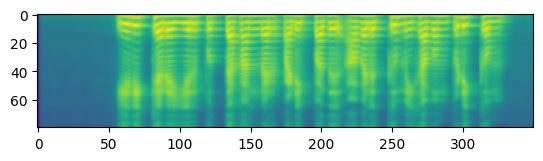

In [55]:
plt.figure()
plt.imshow(spectrogram.T)
plt.show()

Finally, use the vocoder to turn the spectrogram into sound.

In [56]:
with torch.no_grad():
    speech = vocoder(spectrogram)

In [57]:
from IPython.display import Audio
Audio(speech.numpy(), rate=16000)

In [58]:
import soundfile as sf
sf.write("output_ta.wav", speech.numpy(), samplerate=16000)